#Assignment: Image Classification
*   Abigail Smith (ARS190011), Eric Shields (ESS190007)
*   CS 4375.004
*   Dr. Mazidi
*   04/22/2023




#Setting Up Program

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If training using google colab. Otherwise using pandas
from google.colab import drive
drive.mount('/content/drive')
file = "/content/drive/MyDrive/Colab_Notebooks/tom_and_jerry"

Mounted at /content/drive


In [4]:
## If training from a computer
file = "tom_and_jerry"

#Describing the Dataset
The dataset used for this assignment is a Tom and Jerry image classification dataset from Kaggle (https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification). The dataset consists of two types of images -- either images of Tom or images of Jerry. While the original dataset provided a subset of images with both of these cartoon characters in the same image, we decided for this project to use the subsets with only one of the characters in an image. Both the sequential and CNN models should be able to predict if an image has Tom or has Jerry in it.

#Dividing Dataset into Test/Train

In [5]:
batchSize = 32 # arbitrary
epochs = 10 # how many passes forward and backwards
imageSize = (200, 100)

train, test  = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab_Notebooks/tom_and_jerry",
    validation_split = .2,
    subset = "both",
    seed = 1234,
    image_size = imageSize,
    label_mode = "binary",
    color_mode = "rgb",
    batch_size = batchSize
)

Found 3170 files belonging to 2 classes.
Using 2536 files for training.
Using 634 files for validation.


##Exploration

In [ ]:
## Prints the first image batch
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 100, 3)
(32, 1)


In [ ]:
## Prints the class names that will be used for training
class_names = train.class_names
print(class_names)

['jerry', 'tom']


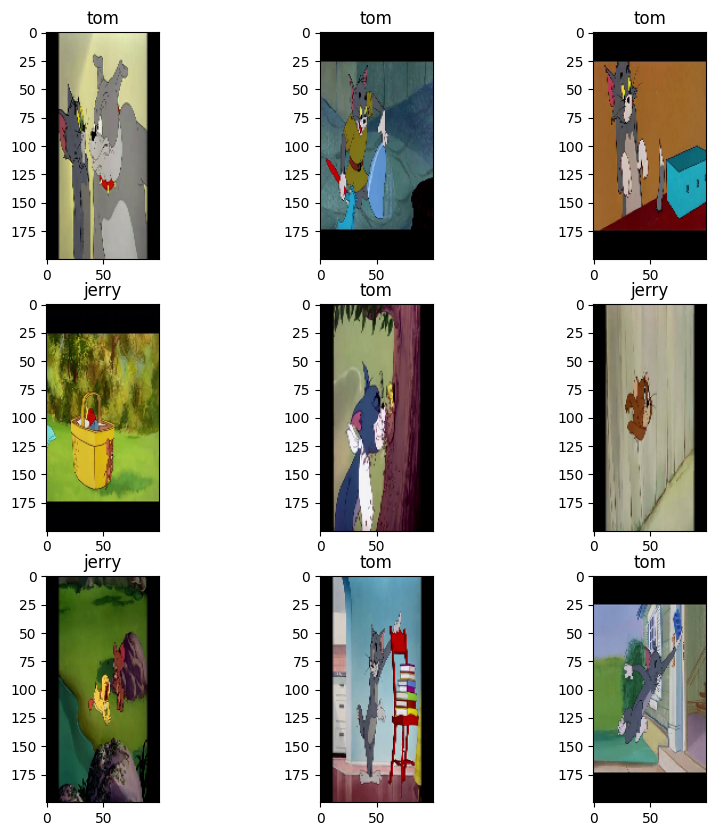

In [ ]:
## Prints pictures with all of the various classes
plt.figure(figsize = (10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])

In [ ]:
## Finding distribution in train dataset
labels = []
train_unbatched = tuple(train.unbatch())
for (image, label) in train_unbatched:
  labels.append(label.numpy())
labels = pd.Series(labels)
count = labels.value_counts().sort_index()
count.index = class_names

print(count)


jerry    1003
tom      1533
dtype: int64


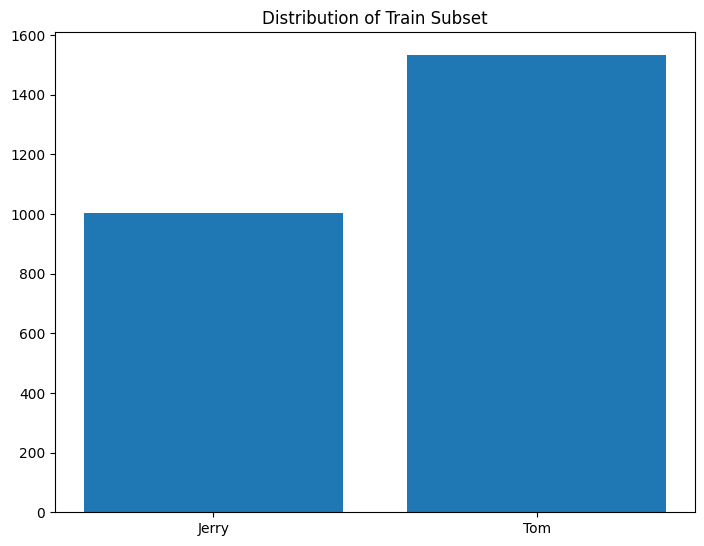

In [ ]:
figure = plt.figure()
axes = figure.add_axes([1, 1, 1, 1])
x_axis = ['Jerry', 'Tom']
y_axis = [count[0], count[1]]
axes.set_title("Distribution of Train Subset")
axes.bar(x_axis, y_axis)
plt.show()

In [ ]:
## Finding distribution in test dataset
labels = []
test_unbatched = tuple(test.unbatch())
for (image, label) in test_unbatched:
  labels.append(label.numpy())
labels = pd.Series(labels)
count = labels.value_counts().sort_index()
count.index = class_names

print(count)

jerry    237
tom      397
dtype: int64


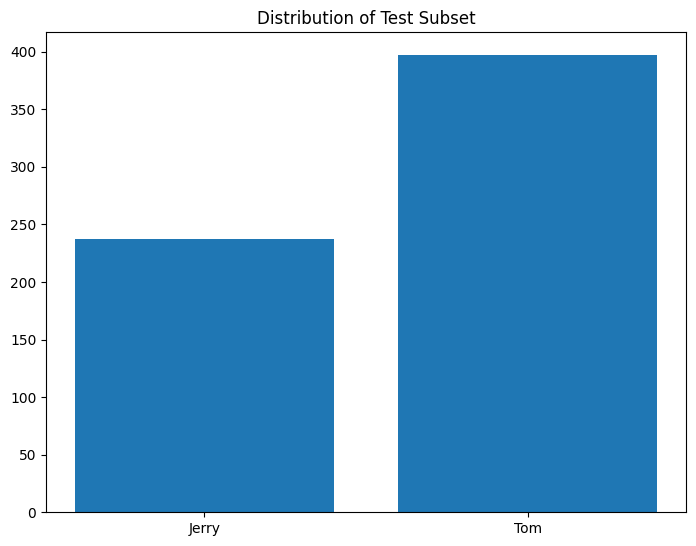

In [ ]:
figure = plt.figure()
axes = figure.add_axes([1, 1, 1, 1])
x_axis = ['Jerry', 'Tom']
y_axis = [count[0], count[1]]
axes.set_title("Distribution of Test Subset")
axes.bar(x_axis, y_axis)
plt.show()

##Sequential Model

####Creating Model

In [ ]:
#Getting number of classes
num_classes = len(class_names)

## Model creation but without the convalution level for a plain sequential model
model = Sequential([
  layers.Flatten(input_shape = (200, 100, 3)),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation = 'relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation = 'relu'),
  layers.Dropout(0.2),
  layers.Dense(2, activation = 'softmax')
])

####Showing Summary

In [ ]:
## Prints the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 60000)             0         
                                                                 
 dense (Dense)               (None, 512)               30720512  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

####Compiling Model

In [ ]:
## Compiles the sequantial model
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Fitting Model

In [ ]:
## Fits the model to the data
epochs = 10
history = model.fit(
  train,  
  validation_data=test,
  epochs=epochs,
  batch_size = batchSize,
  verbose = 1
)

Epoch 1/10
80/80 [==============================] - 56s 673ms/step - loss: 1530.1299 - accuracy: 0.5426 - val_loss: 299.1588 - val_accuracy: 0.3738
Epoch 2/10
80/80 [==============================] - 53s 639ms/step - loss: 81.9818 - accuracy: 0.5229 - val_loss: 1.0233 - val_accuracy: 0.3722
Epoch 3/10
80/80 [==============================] - 53s 643ms/step - loss: 6.6325 - accuracy: 0.4803 - val_loss: 0.6935 - val_accuracy: 0.3738
Epoch 4/10
80/80 [==============================] - 54s 661ms/step - loss: 1.6129 - accuracy: 0.5793 - val_loss: 0.6815 - val_accuracy: 0.6262
Epoch 5/10
80/80 [==============================] - 50s 616ms/step - loss: 1.3808 - accuracy: 0.5946 - val_loss: 0.6748 - val_accuracy: 0.6262
Epoch 6/10
80/80 [==============================] - 54s 655ms/step - loss: 1.0403 - accuracy: 0.5970 - val_loss: 0.6693 - val_accuracy: 0.6262
Epoch 7/10
80/80 [==============================] - 52s 641ms/step - loss: 1.1712 - accuracy: 0.6013 - val_loss: 0.6659 - val_accuracy: 

####Plotting Accuracy to Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

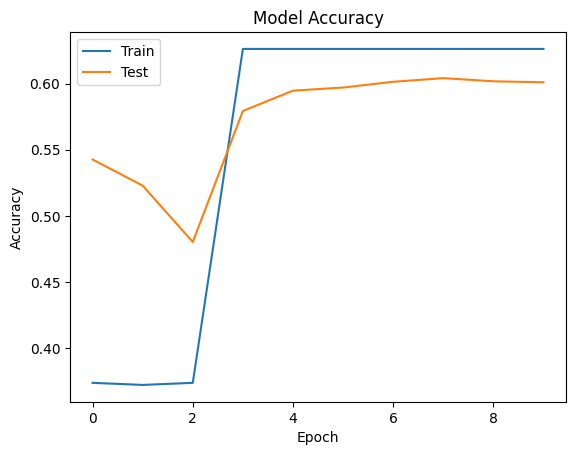

In [ ]:
#Plots the accuarcy
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

The sequential model is a little different in that the increases we get without the convulation layer are significantly less. Additionally unlike the CNN architechure the model doesn't perform as well on the test data. In fact with a 60 percent sucess rate we are only slightly more likely to get the right answer than flipping a coin. This was after trying multiple neural net set-ups as well. Tried single Dense layer to 3 layer of Dense with multiple types of nodes at each layer.

##CNN Model

####Creating Model

In [7]:
# Prints the number of classes 
num_classes = len(class_names)

## Makes a sequential model using the keras api for a CNN architechure. Has several layers that ends in a softmax for binary classification
model = Sequential([
  layers.Rescaling(1./255, input_shape=(200, 100, 3)),
  layers.Conv2D(100, (3, 3), activation = "relu"),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Conv2D(100, (3, 3), activation = 'relu'),
  layers.MaxPooling2D(pool_size = (2, 2)),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(2, activation = "softmax")
])

####Showing Summary

In [ ]:
## The summary of a model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 98, 100)      2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 47, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 23, 100)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 110400)           

####Compiling Model

In [8]:
## Compiles the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Fitting Model

In [9]:
## Fits the model
epochs = 10
history = model.fit(
  train,  
  validation_data=test,
  epochs=epochs,
  batch_size = batchSize,
  verbose = 1
)

Epoch 1/10
80/80 [==============================] - 382s 4s/step - loss: 0.6440 - accuracy: 0.6427 - val_loss: 0.4838 - val_accuracy: 0.7823
Epoch 2/10
80/80 [==============================] - 333s 4s/step - loss: 0.4826 - accuracy: 0.7780 - val_loss: 0.4874 - val_accuracy: 0.7776
Epoch 3/10
80/80 [==============================] - 337s 4s/step - loss: 0.3641 - accuracy: 0.8438 - val_loss: 0.3321 - val_accuracy: 0.8691
Epoch 4/10
80/80 [==============================] - 317s 4s/step - loss: 0.2795 - accuracy: 0.8927 - val_loss: 0.2644 - val_accuracy: 0.8896
Epoch 5/10
80/80 [==============================] - 344s 4s/step - loss: 0.2055 - accuracy: 0.9263 - val_loss: 0.2279 - val_accuracy: 0.8991
Epoch 6/10
80/80 [==============================] - 335s 4s/step - loss: 0.1991 - accuracy: 0.9326 - val_loss: 0.2120 - val_accuracy: 0.9038
Epoch 7/10
80/80 [==============================] - 337s 4s/step - loss: 0.1482 - accuracy: 0.9397 - val_loss: 0.2631 - val_accuracy: 0.8975
Epoch 8/10
80

####Plotting Accuracy to Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

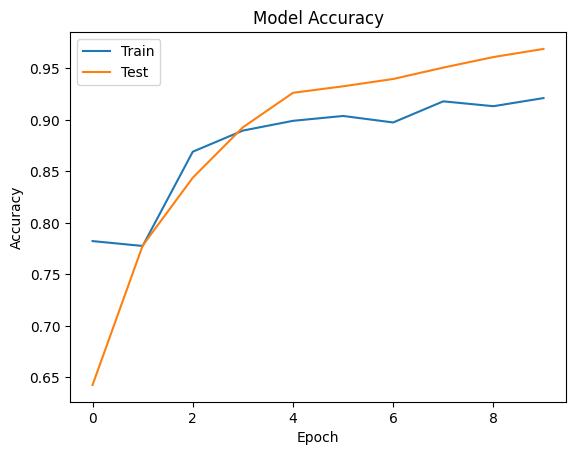

In [10]:
## Makes a plot with the accuracy of the model
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

When it comes to training this model with the CNN architechure we can see that even the starting accuracy is pretty high at around 70 percent. There are pretty sharp increases as well for the first 2 epochs. After epoch 3 we can see that the model switches to fine tuning the with some up and down in the train data. What is interesting is that the model definetly isn't overfitted to the dataset, because our test data performs better than the original training dataset.

I think a big reason for this is the convalution layer, but I would be interested to see if changing the image sizes back to their original size would help the model work a little better. Unfortunately I can't test this because I don't have enough ram to keep the pictures in memory. 

##Using Pretrained Model
by following the provided tutorial: https://www.tensorflow.org/tutorials/images/transfer_learning

####Downloading Data

In [11]:
# Gets all of the data fom a given url and save it as a file
database_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin = database_url, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Getting train and test directories
train_directory = os.path.join(PATH, 'train')
test_directory = os.path.join(PATH, 'validation')

# Setting up batch and image sizes
batchSize = 32
imageSize = (200, 100)

68606236/68606236 [==============================] - 2s 0us/step


####Creating Train Subset

In [12]:
#Loads the data to memory
train = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    shuffle = True,
    batch_size = batchSize,
    image_size = imageSize
)

Found 2000 files belonging to 2 classes.


####Creating Test Subset

In [13]:
#Loads a seperate directory as the validation data set
test = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    shuffle = True,
    batch_size = 32,
    image_size = imageSize
)

Found 1000 files belonging to 2 classes.


### Data Exploration

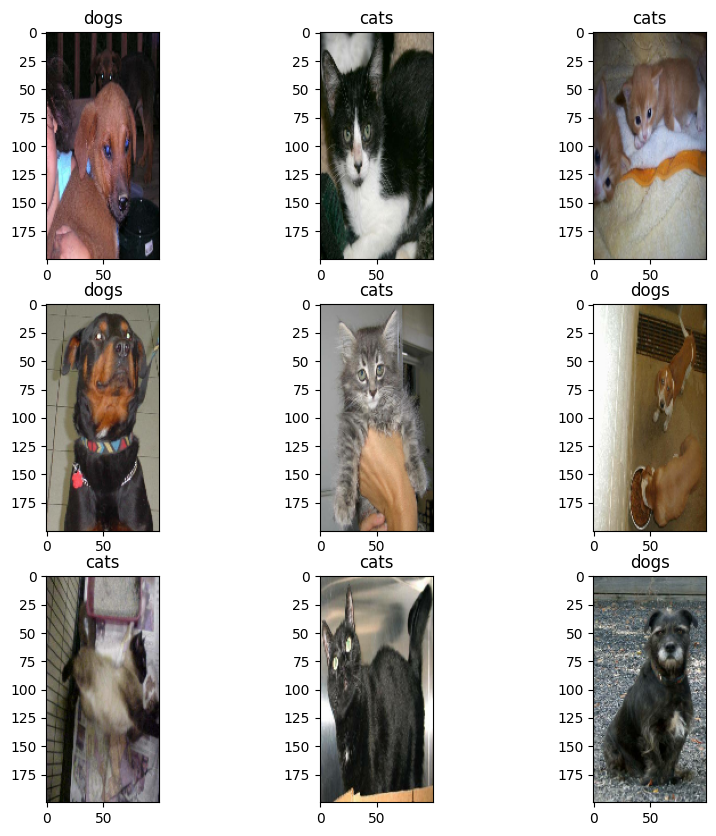

In [14]:
# Gets all of the class names
class_names = train.class_names

## Prints pictures with all of the various classes
plt.figure(figsize = (10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

###Preparing to Create Model

In [15]:
## Splits the validation dataset and the test set into their batches for training efficency
test_batches = tf.data.experimental.cardinality(test)
test_dataset = test.take(test_batches // 5)
test = test.skip(test_batches // 5)

print('Count of test batches: %d' % tf.data.experimental.cardinality(test))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Count of test batches: 26
Number of test batches: 6


In [16]:
## Will prefetch the data
AUTOTUNE = tf.data.AUTOTUNE

train = train.prefetch(buffer_size = AUTOTUNE)
test = test.prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size = AUTOTUNE)

In [17]:
## Augements the data by spinning the images to a certain extend
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('vertical'),
  tf.keras.layers.RandomRotation(0.6),
])

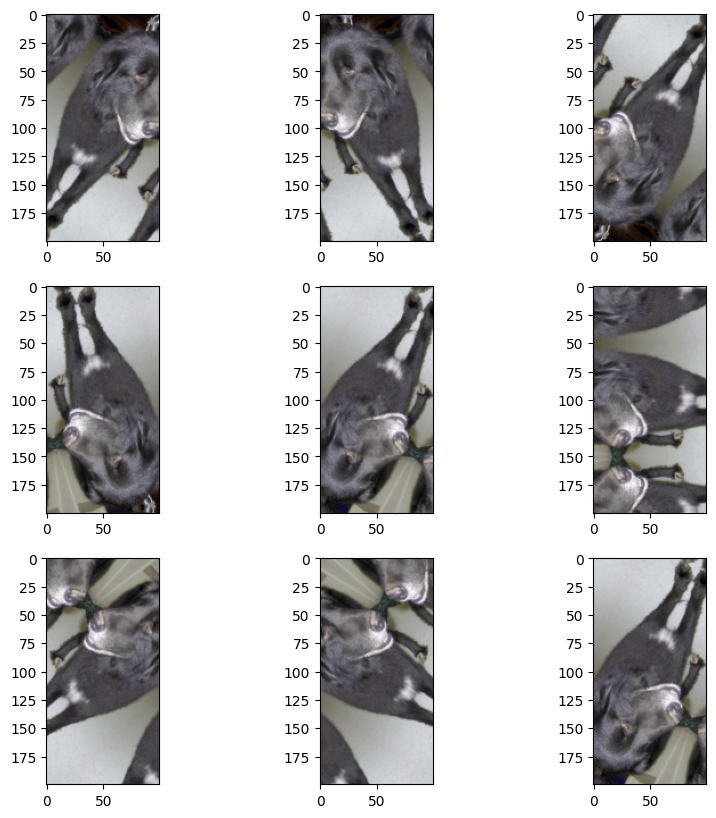

In [18]:
## Prints an augemented picture
for image, _ in train.take(1):
  plt.figure(figsize = (10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)

In [19]:
## Makes a preprocessing unit that can be used to scale the images
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [20]:
## Rescales the images to be 1/127th the size they were originally
rescale = tf.keras.layers.Rescaling(1./127.5, offset = -1)

###Creating Model

In [21]:
# Creating base model
image_shape = imageSize + (3,)

base_model = tf.keras.applications.MobileNetV2(
    input_shape = image_shape,
    include_top = False,
    weights = 'imagenet'
)

9406464/9406464 [==============================] - 2s 0us/step


In [22]:
## Shows that batches are 32 images in a 5 by 5 
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 4, 1280)


###Showing Summary

In [23]:
# Setting base model to trainable and printing summary
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 50, 32)  864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 50, 32)  128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 100, 50, 32)  0           ['bn_Conv1[0][

In [24]:
# Adding a classification head 
globalAverageLayer = tf.keras.layers.GlobalAveragePooling2D()
featureBatchAverage = globalAverageLayer(feature_batch)
print(featureBatchAverage.shape) ## Prints the batch sizes

(32, 1280)


In [25]:
# Using tf.keras.layers.Dense to change featuers to a single predicition per image
predictionLayer = tf.keras.layers.Dense(1)
predictionBatch = predictionLayer(featureBatchAverage)
print(predictionBatch.shape)

(32, 1)


###Compiling Model

In [26]:
# Building model
inputs = tf.keras.Input(shape=(200, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = globalAverageLayer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = predictionLayer(x)
model = tf.keras.Model(inputs, outputs)

In [27]:
# Compiling model
learningRate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learningRate),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [28]:
# Printing summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 100, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 200, 100, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 200, 100, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 200, 100, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 4, 1280)       2257984   
 ional)                                                          
                                                             

###Fitting Model

In [29]:
## Fits the model
epochs = 10
history = model.fit(train,
                    epochs=epochs,
                    validation_data=test)

Epoch 1/10
63/63 [==============================] - 58s 838ms/step - loss: 0.9881 - accuracy: 0.4700 - val_loss: 0.8405 - val_accuracy: 0.4678
Epoch 2/10
63/63 [==============================] - 59s 920ms/step - loss: 0.8186 - accuracy: 0.5380 - val_loss: 0.6594 - val_accuracy: 0.6052
Epoch 3/10
63/63 [==============================] - 59s 931ms/step - loss: 0.7639 - accuracy: 0.5705 - val_loss: 0.5421 - val_accuracy: 0.6832
Epoch 4/10
63/63 [==============================] - 60s 951ms/step - loss: 0.6733 - accuracy: 0.6195 - val_loss: 0.4619 - val_accuracy: 0.7537
Epoch 5/10
63/63 [==============================] - 61s 970ms/step - loss: 0.6346 - accuracy: 0.6535 - val_loss: 0.4221 - val_accuracy: 0.7686
Epoch 6/10
63/63 [==============================] - 59s 941ms/step - loss: 0.6164 - accuracy: 0.6660 - val_loss: 0.3752 - val_accuracy: 0.8045
Epoch 7/10
63/63 [==============================] - 58s 926ms/step - loss: 0.5695 - accuracy: 0.6940 - val_loss: 0.3335 - val_accuracy: 0.8354

###Plotting Accuracy and Loss to Epoch

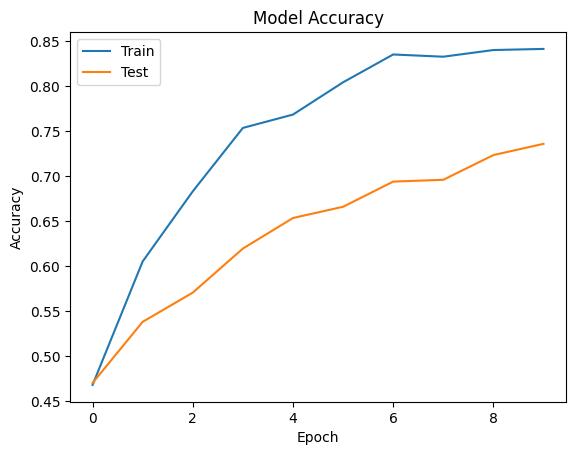

In [30]:
## Makes a plot with the accuracy of the model
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

prev_acc = history.history['accuracy']

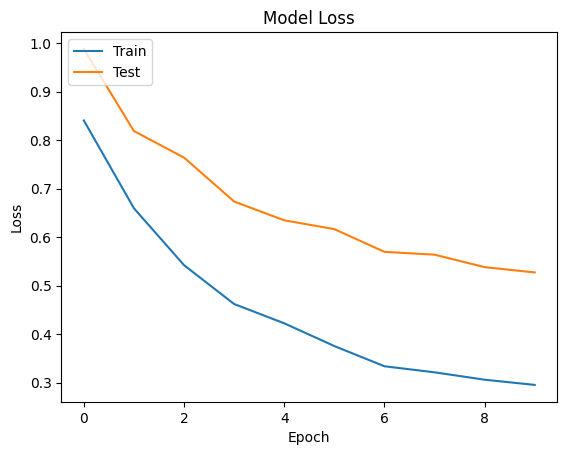

In [31]:
## Makes a plot with the loss of the model
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

prev_loss = history.history['loss']

This model uses the CNN model previously constructed. We can see that at least in regards to its current data of cats and dogs it has a success rate of around 75 percent after 10 epochs. We can see from the loss diagram that, as the model progressed through the epochs, that the model was able to improve in its predictions -- a fact that is reflected in the way accuracy rised throughout each epoch. Though not required, in the next steps we are going to fine tune the model to attempt to see if we can improve the performance of the model at all.

#Additional Steps: Fine Tuning

###Preparing for Fine Tuning

In [32]:
## Allows for finetuning from other people or ourselves
base_model.trainable = True

In [33]:
# Unfreezing the base model and setting bottom layers to untrainable
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

###Compiling Model

In [34]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learningRate/10),
    metrics=['accuracy']
)

###Showing Summary

In [35]:
model.summary()

## Model has 8 different levels to train and most are transformation layers though and 
## only at the mobilenet and dense layers are we training the model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 100, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 200, 100, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 200, 100, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 200, 100, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 4, 1280)       2257984   
 ional)                                                          
                                                             

###Fitting Model

In [36]:
## We have to pass through the hyper parameters that will define the new model. This shows through as additonal epochs 11-20 
## that can be seen as additional training

tunedEpochs = 10
totalEpochs =  epochs + tunedEpochs

history_fine = model.fit(
    train,
    epochs=totalEpochs,
    initial_epoch=history.epoch[-1],
    validation_data=test
  )

Epoch 10/20
63/63 [==============================] - 99s 1s/step - loss: 0.4866 - accuracy: 0.7690 - val_loss: 0.2118 - val_accuracy: 0.8936
Epoch 11/20
63/63 [==============================] - 92s 1s/step - loss: 0.3859 - accuracy: 0.8125 - val_loss: 0.1547 - val_accuracy: 0.9356
Epoch 12/20
63/63 [==============================] - 86s 1s/step - loss: 0.3524 - accuracy: 0.8360 - val_loss: 0.1558 - val_accuracy: 0.9381
Epoch 13/20
63/63 [==============================] - 89s 1s/step - loss: 0.3420 - accuracy: 0.8395 - val_loss: 0.1635 - val_accuracy: 0.9134
Epoch 14/20
63/63 [==============================] - 92s 1s/step - loss: 0.3268 - accuracy: 0.8455 - val_loss: 0.1499 - val_accuracy: 0.9369
Epoch 15/20
63/63 [==============================] - 92s 1s/step - loss: 0.2991 - accuracy: 0.8645 - val_loss: 0.1442 - val_accuracy: 0.9307
Epoch 16/20
63/63 [==============================] - 91s 1s/step - loss: 0.3091 - accuracy: 0.8525 - val_loss: 0.1553 - val_accuracy: 0.9455
Epoch 17/20
6

###Plotting Accuracy and Loss to Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

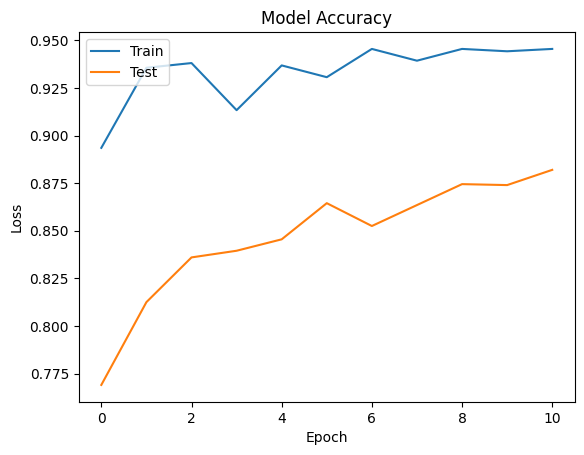

In [37]:
## Makes a plot with the accuracy of the model
plt.plot(history_fine.history['val_accuracy'])
plt.plot(history_fine.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

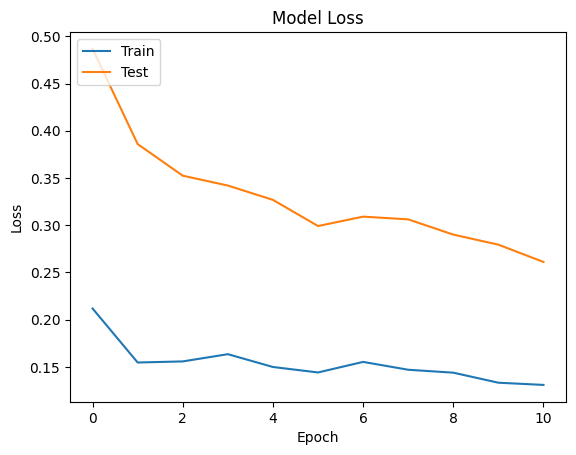

In [38]:
## Makes a plot with the loss of the model
plt.plot(history_fine.history['val_loss'])
plt.plot(history_fine.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

With fine tuning, we were able to steadily increase the accuracy of our model and, in turn, decrease the loss. One important thing to note is that the test subset has the greatest response to fine tuning, as seen in both the "Model Accuracy" and "Model Loss" graphs. In contrast, the train subset had little impact, but steadily showed improvement with each epoch.